Hebani Duggal hd288 Problem Set 6 
Discussed high level strategies with ta323, tw292, ae277

In [12]:
#Question2, Part A

In [13]:
N = 7500000
N2 = int(N/10)

amazon = 0
amazon_total = 0
wiki = 0
wiki_total = 0

for i in range(1,N2):
    amazon+=1/(i**0.87)
    wiki+=1/(i**1.7)
    
for i in range(1,N):
    amazon_total+=1/(i**0.87)
    wiki_total+=1/(i**1.7)

print (amazon_total-amazon)/amazon_total #fraction contribution of k to latter 90% of the ranked items (.1N to N)
print (wiki_total-wiki)/wiki_total #fraction contribution of k to latter 90% of the ranked items (.1N to N)

#total doesnt depend on value of N, can see that there is little change from original answer by changing the value of N 
#for example, if N is 7 million:

N = 7000000
N2 = int(N/10)

amazon = 0
amazon_total = 0
wiki = 0
wiki_total = 0

for i in range(1,N2):
    amazon+=1/(i**0.87)
    wiki+=1/(i**1.7)
    
for i in range(1,N):
    amazon_total+=1/(i**0.87)
    wiki_total+=1/(i**1.7)

print (amazon_total-amazon)/amazon_total #fraction contribution of k to latter 90% of the ranked items (.1N to N) for a different N value
print (wiki_total-wiki)/wiki_total #fraction contribution of k to latter 90% of the ranked items (.1N to N) for a different N value 

0.293395600985
4.29585475789e-05
0.29375066265
4.50841715645e-05


In [14]:
#Question 2, Part B 

In [15]:
amazon_double = 0
wiki_double = 0

for i in range(1,2*N):
    amazon_double += 1/(i**0.87)
    wiki_double += 1/(i**1.7)
    
print 100*((amazon_double/amazon_total)-1) #percentage of sales growth, amazon
print 100*((wiki_double/wiki_total)-1) #percentage of sales growth, wiki

#changing N in part a doesn't drastically change growth in % of amazon and wiki sales, can see this by changing value of N above 


10.7073554931
0.00043200774793


In [16]:
#Question 3, Part A 

In [17]:
import math as math 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
from scipy.stats import linregress

In [18]:
slope_y = math.log(10**4) - math.log(10**3)
slope_x = math.log(10**6)- math.log(10**4)

print slope_y/slope_x #estimated power law exponent of the fit to the data (red line).

0.5


In [ ]:
#Question 3, Part B

In [19]:
ptexts=[open('ps2data/p{}.txt'.format(i)).read() for i in range(30)]
stexts=[open('ps2data/s{}.txt'.format(i)).read() for i in range(30)]
ttexts=[open('ps2data/t{}.txt'.format(i)).read() for i in range(10)]
total_texts = ptexts+stexts+ttexts

[448, 710, 1128, 1318, 1532, 1826, 1993, 2143, 2307, 2627, 2839, 2983, 3184, 3379, 3509, 3636, 3836, 3955, 4072, 4152, 4241, 4335, 4413, 4488, 4644, 4784, 4984, 5086, 5198, 5284, 5396, 5565, 5730, 5934, 6067, 6268, 6450, 6513, 6628, 6785, 6956, 7173, 7238, 7391, 7491, 7600, 7677, 7783, 7885, 7934, 8027, 8150, 8258, 8358, 8460, 8605, 8686, 8771, 8907, 9028, 9103, 9202, 9297, 9419, 9517, 9587, 9645, 9714, 9775, 9928]
[968, 1730, 3320, 3953, 4718, 5946, 6681, 7474, 8358, 9737, 10500, 11365, 12494, 13562, 14466, 15515, 17026, 17843, 18631, 19527, 20300, 21103, 21921, 22655, 23732, 24961, 25928, 27004, 28205, 29231, 30054, 31169, 32273, 33664, 34540, 35737, 37229, 38144, 39727, 40787, 42052, 43647, 44922, 45970, 47223, 48418, 49557, 50636, 51306, 51908, 52861, 54081, 55103, 56132, 57217, 58588, 59547, 60796, 62145, 63393, 64396, 65567, 66886, 68111, 69211, 70490, 71394, 72360, 73497, 75095]


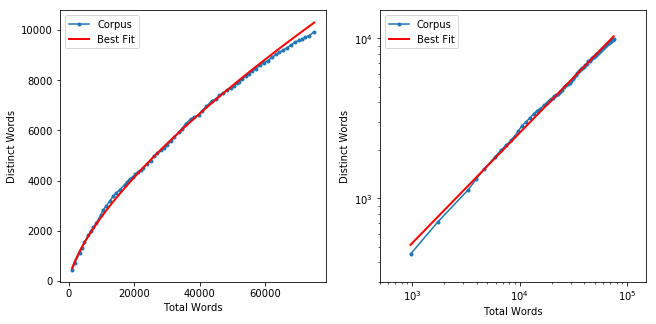

In [20]:
h = Counter()

dist = 0
all = 0

distwords = []
allcount = []
distcount = []

for i in total_texts: 
    h = Counter(re.findall("[a-z']+",i.lower()))
    for b in h:
        if b in distwords:
            distwords = distwords
        else:
            distwords.append(b)
            dist+=1
    for k in h.values():
        all += k
    distcount.append(dist)
    allcount.append(all)

print(distcount) #number of accumulated distinct words
print(allcount) #number of accumulated total words

plt.figure(figsize=(10.5,5))
plt.subplot(1,2,1)
plt.xlabel('Total Words'), plt.ylabel('Distinct Words')
plt.plot(allcount,distcount,'.-')


logxdata,logydata = map(np.log,(allcount,distcount))
slope, intercept, r_value, p_value, std_err = linregress(logxdata,logydata)
plt.plot(allcount,np.exp(intercept)*allcount**slope,'r',lw=2)
plt.legend(['Corpus','Best Fit'],loc='upper left')

plt.subplot(1,2,2)
plt.xlabel('Total Words'), plt.ylabel('Distinct Words')
plt.loglog(allcount,distcount,'.-')
plt.xlim(500,150000)
plt.ylim(300,15000)


logxdata,logydata = map(np.log,(allcount,distcount))
slope, intercept, r_value, p_value, std_err = linregress(logxdata,logydata)
plt.plot(allcount,np.exp(intercept)*allcount**slope,'r',lw=2)
plt.legend(['Corpus','Best Fit'],loc='upper left') #slope = 0.6897

plt.show()

In [21]:
#Question 4, Part A, Part 1 

In [22]:
import random

In [23]:
N=100000
E=set()
z = 5
L=N*z/2.
p = L/(N*(N-1)/2)

while(len(E)<L): E.add(tuple(random.sample(xrange(N),2)))

vertices_list = [v for edge in E for v in edge]
   
dict_degree = Counter(vertices_list)

print N-len(dict_degree) #the number of vertices not included
print N*(1-p)**(N-1) #expectation of zero successes in N-1 trials with probability p

633
673.710477183


In [24]:
#Question 4, Part A, Part 2

In [25]:
mean = np.mean(list(dict_degree.values()))
std = np.std(list(dict_degree.values()))

print mean
print math.sqrt(5) 
print std

5.03185162076
2.2360679775
2.20281582817


In [26]:
#Question 4, Part A, Part 3
def poisson(m,z=1): return math.exp(-z)*z**m/math.factorial(m)

99367


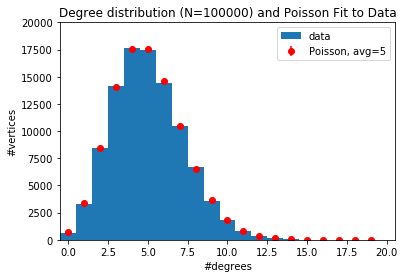

In [27]:
nodegree = N-len(dict_degree.values())
values_degree = list(dict_degree.values())

avg = 0

poisson_fit = []
std = []


for i in values_degree:
    avg+=i
avg = avg/N
print(len(values_degree))

for i in range(20):
    poisson_fit.append(poisson(i,avg))

for i in poisson_fit:
    std.append(math.sqrt(N*i*(1-i)))

plt.xlim(-.5,20.5),plt.ylim(0,20000)
plt.xlabel('#degrees'),plt.ylabel('#vertices')
plt.hist(list(dict_degree.values()) + [0]*nodegree, bins=range(30),align='left');
for i in range(20):
    plt.errorbar(i,N*poisson(i,avg),yerr=std[i],color='r',fmt='o',linewidth=1.5,linestyle='none')
plt.title('Degree distribution (N=100000) and Poisson Fit to Data')
plt.legend(['data','Poisson, avg=5'])
plt.show()

In [28]:
#Question 4, Part B, Part 1

In [29]:
random_ = np.random.randint(N,size=100)
degree_value = 0

for i in random_:
    degree_value += dict_degree[i]
    
print degree_value/100 #average degree of vertices

5


In [30]:
#Question 4, Part B, Part 2

In [39]:
random_2 = np.random.randint(N,size=100)
neighbors = {}
degree_value_2 = 0

for i in range(N): 
    neighbors[i] = []
for (i,j) in E:
    if i in neighbors:
        neighbors[i].append(j)
    if j in neighbors: 
        neighbors[j].append(i)
for i in random_2:
    if len(neighbors[i]) == 0:
        degree_value_l2 = degree_value_2
    else:
        random_choice = random.choice(neighbors[i])
        degree_value_2 += dict_degree[random_choice]
        
print degree_value_2/100 #mean for part 2
print degree_value/100 #meant for part 1

#mean in part 2 is greater than mean in part 1
#expected value is the same as mean calculated above for part 2 since its a Poisson distribution

2
5


In [32]:
#Question 4, Part C

In [33]:
edges = 0
cluster_coeff = 0
d = N
dist_friend_pairs = []

for j in neighbors:
    friend_pairs = [(f1,f2) for f1 in neighbors[j] for f2 in neighbors[j] if f1<f2]
    for a in friend_pairs:
        if a in E:
            edges += 1
    if len(friend_pairs) == 0 or len(friend_pairs) == 1:
        d -= 1 
    else:
        cluster_coeff += edges/len(friend_pairs)
    edges = 0
    dist_friend_pairs.extend(friend_pairs)
    
print(cluster_coeff/d) #avg cluster coefficient is 2.26 x 10^-05

0


In [34]:
#Question 5, Part A

In [35]:
import random
from collections import Counter

In [36]:
weighted=[0,1]
N = 200000


for k in range(2,N):
    v1 = random.choice(weighted)
    v2 = random.choice(weighted)
    while v1 == v2:
        v2 = random.choice(weighted)
    weighted += [k,v1,k,v2]
weighted_dict = dict(Counter(weighted))


def inverted_dict(d):
    new_dict = {}
    for a, b in d.items():
        new_dict.setdefault(b, []).append(a)
    return new_dict

w = inverted_dict(weighted_dict)
keys = []
values = []
degrees = []


for i in w: 
    keys.append(i)
    values.append(len(w[i]))
    if i >= 20:
        for a in range(len(w[i])):
            degrees.append(i)
            
            
degrees = sorted(degrees,reverse=True)

2.01812283564


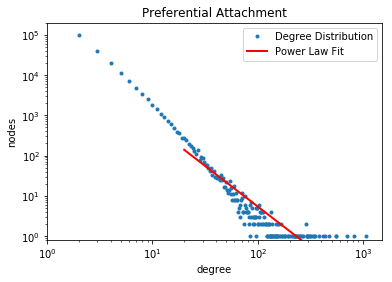

In [45]:
plt.xlabel('degree'), plt.ylabel('nodes')
plt.loglog(keys,values,'.')

logxdata,logydata = map(np.log,(keys,values))
slope, intercept, r_value, p_value, std_err = linregress(logxdata,logydata)
n = len(degrees)
xmin = 20
a = 3
xr = xmin*np.random.rand(n)**(-1/(a-1))
a=1+n/sum(np.log(xr/20))
sigma=(a-1)/math.sqrt(n)
print(a)


C=(alpha-1)*xmin**(alpha-1)
plt.plot(degrees,(n)*C*degrees**(-a),'r-',linewidth=2,label='$\\a={:.4f}$'.format(alpha))
plt.xlim(1,1500)
plt.ylim(0.8,200000)
plt.legend(['Degree Distribution','Power Law Fit'],loc='upper right')
plt.title('Preferential Attachment') #N = 200000
plt.show()

In [ ]:
#Question 5, Part B

In [ ]:
weighted=[0]
N = 1000000
pvalues = [.1, .2, .3, .4, .5, .6,.75]
degrees = []

for p in pvalues:
    for j in range(1,N):
        rand = random.random()
        if rand < p:
            i=random.randrange(j)
            weighted.append(i)
        else: 
            i = random.choice(weighted)
            weighted.append(i)
    weighted = dict(Counter(weighted)) #key = degree, value = number of nodes
    weighted_i = invert_dict(weighted)
    for i in weighted_i: 
        if i >= 20:
            for a in range(len(weighted_i[i])):
                degrees_w.append(i)
    degrees_w = sorted(degrees_w,reverse=True)
    weighted = [0]
    xmin2 = 20
    alpha2 = 1+1/(1-p)
    
    print('p =',p,"prediction of p is ",alpha2)
    n2 = len(degrees_w)
    xr2 = xmin2*np.random.rand(n2)**(-1/(alpha2-1))
    alpha2=1+n2/sum(np.log(xr2/xmin2))
    sigma2=(alpha2-1)/math.sqrt(n2)
    
    print('measured power law exponent is ',alpha2,', standard error is',sigma2)
    degrees_w = []

In [ ]:
BONUS QUESTIONS 

In [ ]:
#Question 4, Part D, Part 1, Part 2

In [48]:
F = E.copy()
for fp in dist_friend_pairs:
    rand_n = random.uniform(0,1)
    if rand_n>.5: F.add(fp)
print len(F) #number of edges in the edge set F

listF = [v for edge in F for v in edge]
F_dict = Counter(listF)
mean = np.mean(list(F_dict.values()))
std = np.std(list(F_dict.values()))
print mean
print std

875018
17.611842966
8.47760601168


In [ ]:
#Question 4, Part D, Part 3

In [51]:
neighbors_2 = {}
degree_value_3 = 0

for i in range(N): 
    neighbors_2[i] = []
for (i,j) in F:
    if i in neighbors_2:
        neighbors_2[i].append(j)
    if j in neighbors_2: 
        neighbors_2[j].append(i)
edges_2 = 0
cluster_coeff2 = 0
d2 = N

for j in neighbors_2:
    friend_pairs_2 = [(f1,f2) for f1 in neighbors_2[j] for f2 in neighbors_2[j] if f1<f2]
    for a in friend_pairs_2:
        if a in F:
            edges_2 += 1
    if len(friend_pairs_2) == 0 or len(friend_pairs_2) == 1:
        d2 -= 1 
    else:
        cluster_coeff2 += edges_2/len(friend_pairs_2)
    edges_2 = 0
    
print cluster_coeff2/d2 #average clustering coefficient #.1550

0


In [ ]:
#Question 4, Part D, Part 4

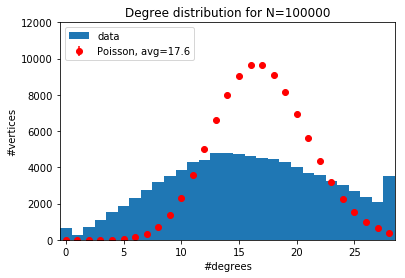

In [54]:
N = 100000
no_degree_bonus = N-len(F_dict.values())
values_bonus = list(F_dict.values())
avg_bonus = 0
poisson_bonus = []
std_bonus = []
for i in values_bonus:
    avg_bonus+=i
avg_bonus = avg_bonus/N

for i in range(30):
    poisson_bonus.append(poisson(i,avg_bonus))

for i in poisson_bonus:
    std_bonus.append(math.sqrt(N*i*(1-i)))

plt.xlim(-.5,28.5),plt.ylim(0,12000)
plt.xlabel('#degrees'),plt.ylabel('#vertices')
plt.hist(list(F_dict.values()) + [0]*no_degree_bonus, bins=range(30),align='left');
for i in range(30):
    plt.errorbar(i,N*poisson(i,avg_bonus),yerr=std_bonus[i],color='r',fmt='o',linewidth=1.5,linestyle='none')
plt.title('Degree distribution for N=100000')
plt.legend(['data','Poisson, avg=17.6'],loc='upper left')
plt.show()

#degree distribution not Poissonian

In [56]:
F_array_2 = np.random.randint(N,size=100)
F_neighbors = {}
F_degree_values = 0
for i in range(N): 
    F_neighbors[i] = []
for (i,j) in F:
    if i in F_neighbors:
        F_neighbors[i].append(j)
    if j in F_neighbors: 
        F_neighbors[j].append(i)
for i in F_array_2:
    if len(F_neighbors[i]) == 0:
        F_degree_values = F_degree_values
    else:
        rand_choice_2 = random.choice(F_neighbors[i])
        F_degree_values += F_dict[rand_choice_2]
z = 2*len(F)/N

print F_degree_values/100 #this mean is more than mean in earlier part of problem 4 

22
